In [22]:
# libs


import yahoo_fin.stock_info as si
from datetime import datetime
import time
import json
import pandas as pd
import numpy as np

In [23]:
temp = pd.DataFrame()
temp['Ticker'] = pd.read_csv('Data/crypto_tickers.csv')

tickers = pd.DataFrame(temp['Ticker'][list(map(lambda x: x.endswith('-USD'), temp['Ticker']))])

tickers.head()

,Ticker
9,AAVE-USD
19,ABBC-USD
29,ACH-USD
39,ACT-USD
49,ADA-USD


In [24]:
def construct_download_url(
	ticker,
	period1,
	period2,
	interval='monthly'
):
	"""
	:period1 & period2: 'yyyy-mm-dd'
	:interval: {daily; weekly, monthly}
	"""
    
	def convert_to_seconds(period):
		datetime_value = datetime.strptime(period, '%Y-%m-%d')
		total_seconds = int(time.mktime(datetime_value.timetuple())) + 86400
		return total_seconds
	try:
		interval_reference = {'daily': '1d', 'weekly': '1wk', 'monthly': '1mo'}
		_interval = interval_reference.get(interval)
		if _interval is None:
			print('interval code is incorrect')
			return
		p1 = convert_to_seconds(period1)
		p2 = convert_to_seconds(period2)
		url = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={p1}&period2={p2}&interval={_interval}&filter=history'
		return url
    
	except Exception as e:
		print(e)
		return

In [25]:
list_df = []

for ticker in tickers['Ticker']:
    # retrive dataset
    
    try:
        
        query_url = construct_download_url(ticker, '2017-01-01', '2023-01-30', 'daily')
        temp = pd.read_csv(query_url)
        temp['coin'] = f'{ticker}'
        list_df.append(temp)
        
    except Exception as e:
        print(e)

HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found


In [29]:
# retrive dataset

"""
list_df = []

for pair in pairs:
    
    try:
        
        query_url = construct_download_url(pair, '2017-01-01', '2023-01-30', 'daily')
        temp = pd.read_csv(query_url)
        temp['coin'] = f'{pair}'
        list_df.append(temp)
        
    except Exception as e:
        e+=1
		print(e)
        
"""

"\nlist_df = []\n\nfor pair in pairs:\n    \n    try:\n        \n        query_url = construct_download_url(pair, '2017-01-01', '2023-01-30', 'daily')\n        temp = pd.read_csv(query_url)\n        temp['coin'] = f'{pair}'\n        list_df.append(temp)\n        \n    except Exception as e:\n        e+=1\n\t\tprint(e)\n        \n"

In [30]:
df = pd.concat(list_df, axis=0, ignore_index=True)

In [31]:
df['Date'] = pd.to_datetime(df['Date'])

# Pivot the dataframe to get the price data in a long format
df = df.pivot(index= 'Date', columns='coin', values='Close')

<AxesSubplot:>

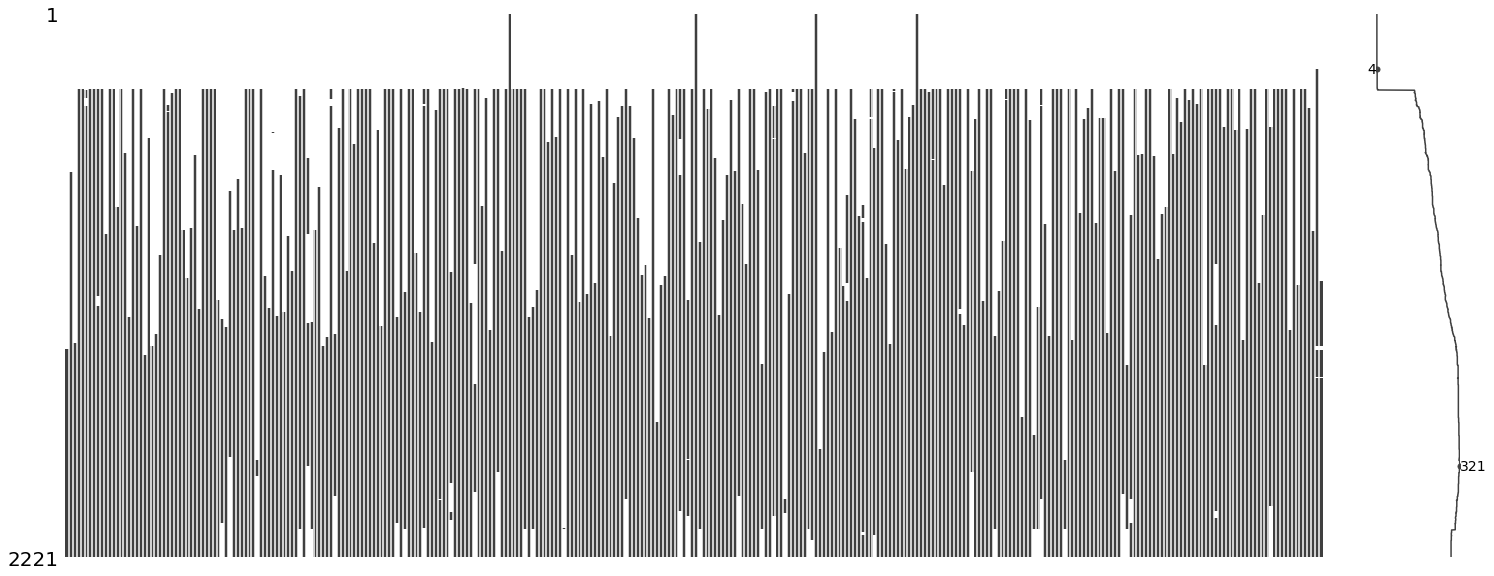

In [32]:
import missingno

missingno.matrix(df)

In [39]:
df_copy = df.copy()
df_copy

coin,AAVE-USD,ABBC-USD,ACH-USD,ACT-USD,ADA-USD,ADK-USD,ADX-USD,AE-USD,AIB-USD,AION-USD,...,XWC-USD,YFI-USD,YOYOW-USD,ZANO-USD,ZEC-USD,ZEN-USD,ZIL-USD,ZNN-USD,ZRX-USD,ZYN-USD
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-26,88.982803,0.075199,0.010946,0.001347,0.380059,0.049814,0.194085,0.076092,0.000691,0.032823,...,0.092541,7547.181641,0.001295,0.499264,46.821453,10.365861,0.027807,2.154250,0.226541,0.265759
2023-01-27,87.139816,0.081234,0.011039,0.001321,0.388979,0.049284,0.191652,0.075812,0.000692,0.032793,...,0.091778,7649.660645,0.001294,0.501210,46.476784,10.630039,0.029189,2.177574,0.240023,0.258577
2023-01-28,84.218231,0.081005,0.011022,0.001320,0.382351,0.048755,0.196458,0.075532,0.000691,0.033607,...,0.091193,7431.888672,0.001331,0.493095,45.399754,10.289081,0.029110,2.145702,0.229763,0.270306


In [40]:
print('Data Shape before cleaning =', df_copy.shape)

missing_percentage = df_copy.isnull().mean().sort_values(ascending=False)
dropped_list = sorted(list(missing_percentage[missing_percentage > 0.20].index))
df_copy.drop(labels=dropped_list, axis=1, inplace=True)

print('Data Shape after cleaning =', df_copy.shape)

Data Shape before cleaning = (2221, 324)
Data Shape after cleaning = (2221, 168)


<AxesSubplot:>

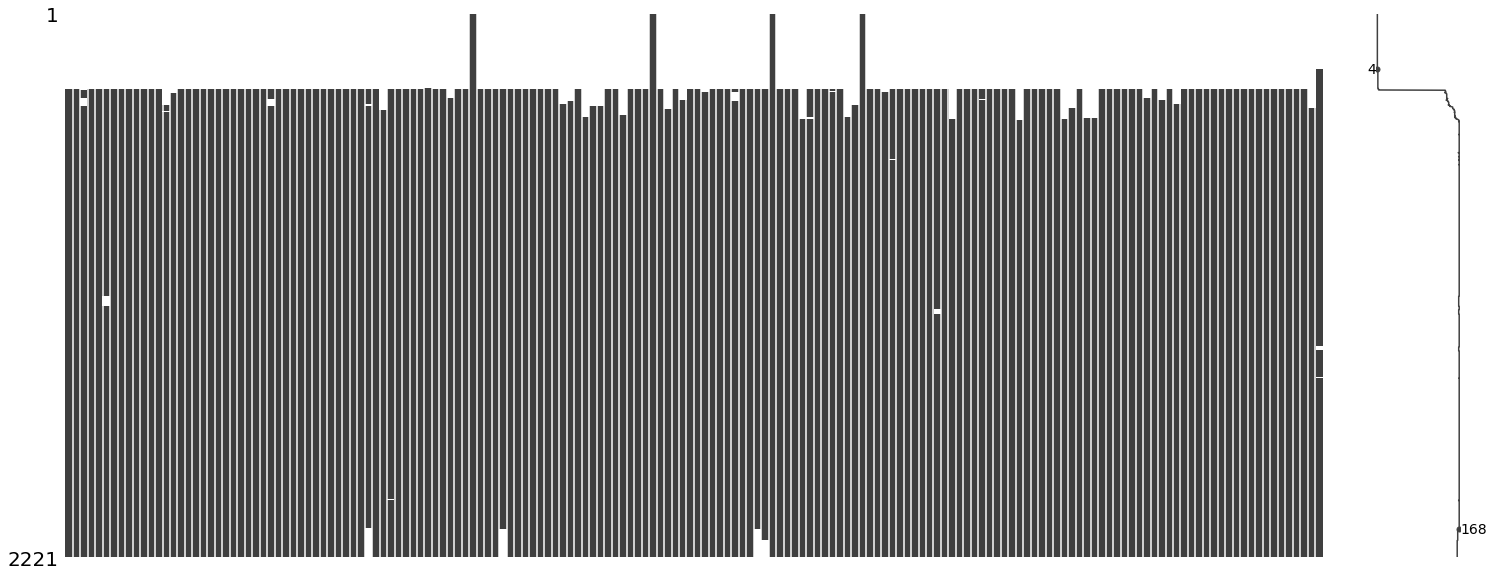

In [41]:
missingno.matrix(df_copy)

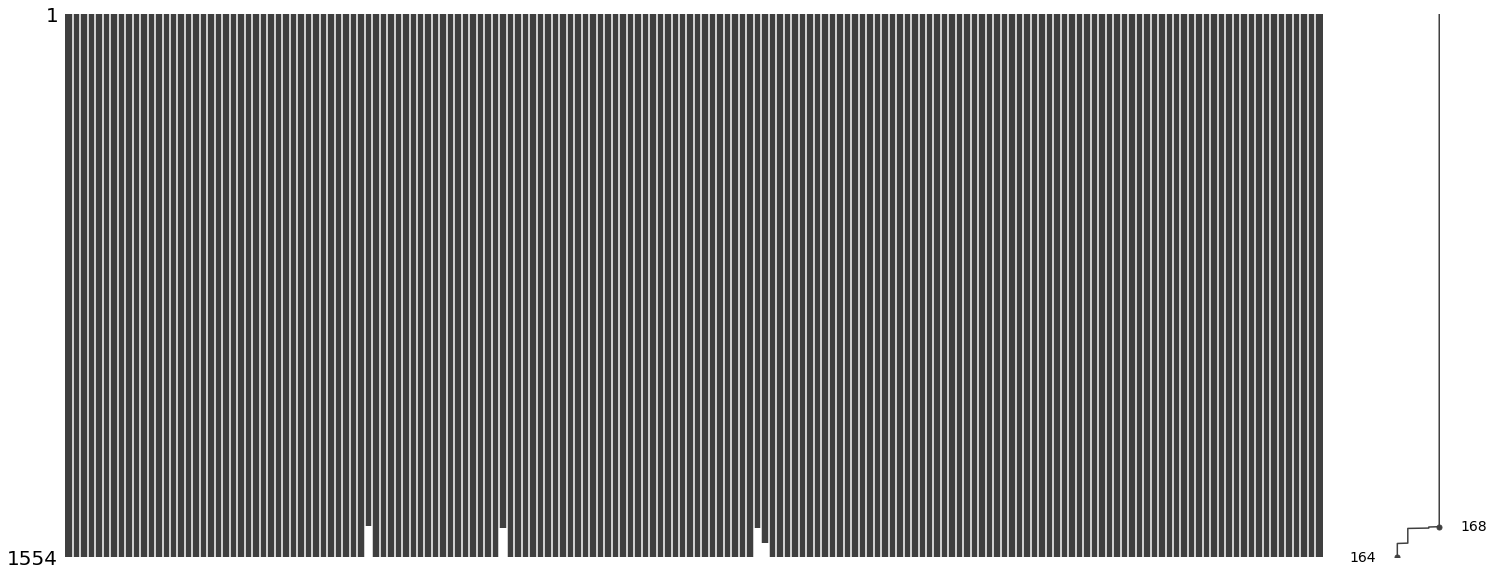

In [56]:
# I will also fill the missing values by the last available value in the column

df_copy = df_copy.fillna(method='bfill')

missingno.matrix(df_copy['2018-10-1':'2023-01-01'])
df_copy.drop(columns='DIME-USD', axis=0, inplace=True)

data = df_copy['2018-10-1':]

In [57]:
data.dropna(axis=1, inplace=True)

data.head()

/var/folders/lb/6zbgqrg520b7c61dgy_1b_tw0000gn/T/ipykernel_23854/3766230510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(axis=1, inplace=True)


coin,ACT-USD,ADA-USD,ADK-USD,ADX-USD,AE-USD,AIB-USD,AION-USD,ALIAS-USD,AMB-USD,ANT-USD,...,XRP-USD,XTZ-USD,XUC-USD,XVG-USD,XWC-USD,YOYOW-USD,ZEC-USD,ZEN-USD,ZIL-USD,ZRX-USD
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-01,0.034675,0.084469,7.25921,0.203599,1.07549,0.010072,0.422602,0.229776,0.143674,0.860702,...,0.576461,1.34959,4.48006,0.016330,0.087023,0.026978,127.380997,17.120701,0.036701,0.642711
2018-10-02,0.032916,0.082525,8.12615,0.198655,1.05488,0.012896,0.423568,0.252648,0.142572,0.824521,...,0.520837,1.33189,4.42423,0.015093,0.094440,0.028138,126.832001,16.747999,0.038466,0.637115
2018-10-03,0.032049,0.080789,8.02118,0.194448,1.05673,0.009801,0.410113,0.243973,0.137197,0.780457,...,0.528162,1.30780,4.35642,0.014849,0.089376,0.028800,122.060997,16.100300,0.037581,0.615925
2018-10-04,0.033257,0.081304,10.21710,0.196305,1.05617,0.014108,0.422195,0.258955,0.139872,0.788400,...,0.526606,1.30214,4.27777,0.015631,0.090653,0.031842,124.031998,16.265200,0.036905,0.644065
2018-10-05,0.033164,0.082991,10.01970,0.205942,1.06409,0.013535,0.446812,0.268707,0.148857,0.814723,...,0.519026,1.32074,4.55598,0.015588,0.086270,0.031423,127.724998,16.307501,0.036513,0.645538


In [58]:
data.to_excel('Data/crypto_dataset_2.xlsx')

In [59]:
sum(data.isna().sum())

0

# Stock Data

In [ ]:
# retrieving stock data

sp500_list = si.tickers_sp500()
print("Number of Tickers in S&P 500:", len(sp500_list))

sp500_historical = {}
for ticker in sp500_list:
    sp500_historical[ticker] = si.get_data(ticker, start_date="01/10/2018", end_date="30/01/2023", index_as_date = False, interval="1d")

data_stock = pd.concat(sp500_historical)
data_stock.reset_index(drop=True, inplace=True)
data_stock = data_stock.pivot(index='date', columns='ticker', values = 'adjclose')

Number of Tickers in S&P 500: 503


/Users/alex/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3369: UserWarning: Parsing '30/01/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3369: UserWarning: Parsing '30/01/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3369: UserWarning: Parsing '30/01/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3369: UserWarning: Parsing '30/01/2023' in DD/MM/YYYY format. Provide format or

<AxesSubplot:>

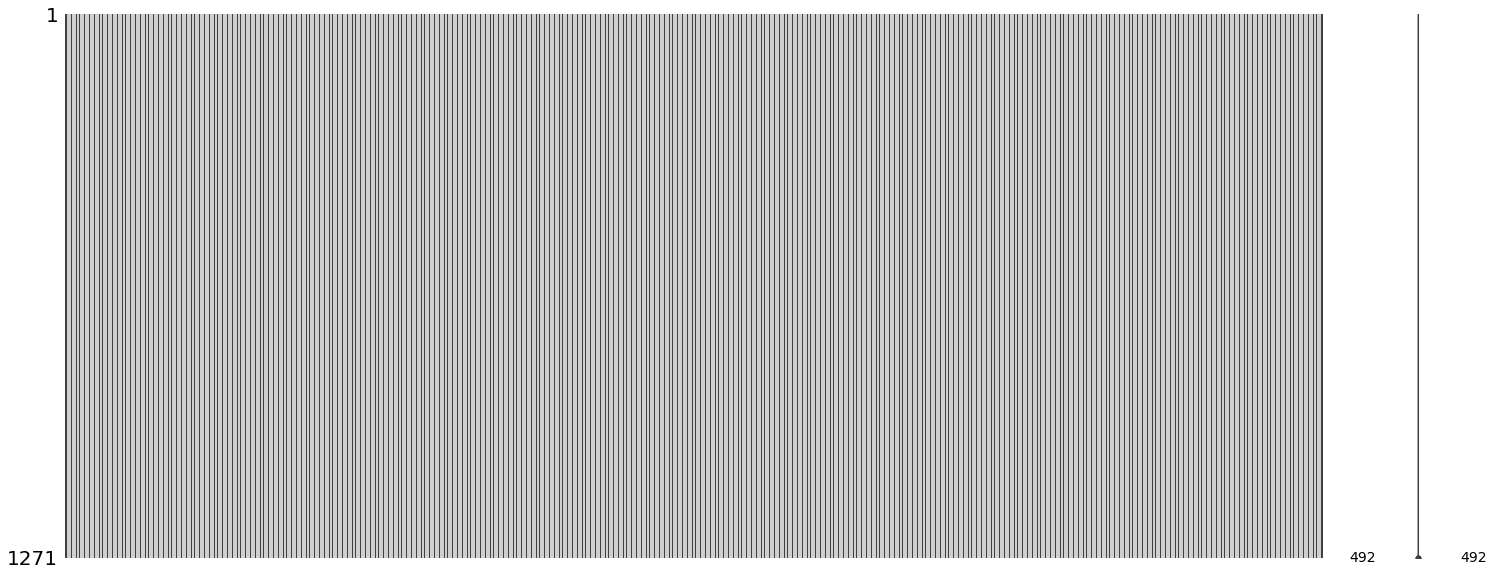

In [118]:
missingno.matrix(data_stock)

Data Shape before cleaning = (1271, 493)
Data Shape after cleaning = (1271, 492)


<AxesSubplot:>

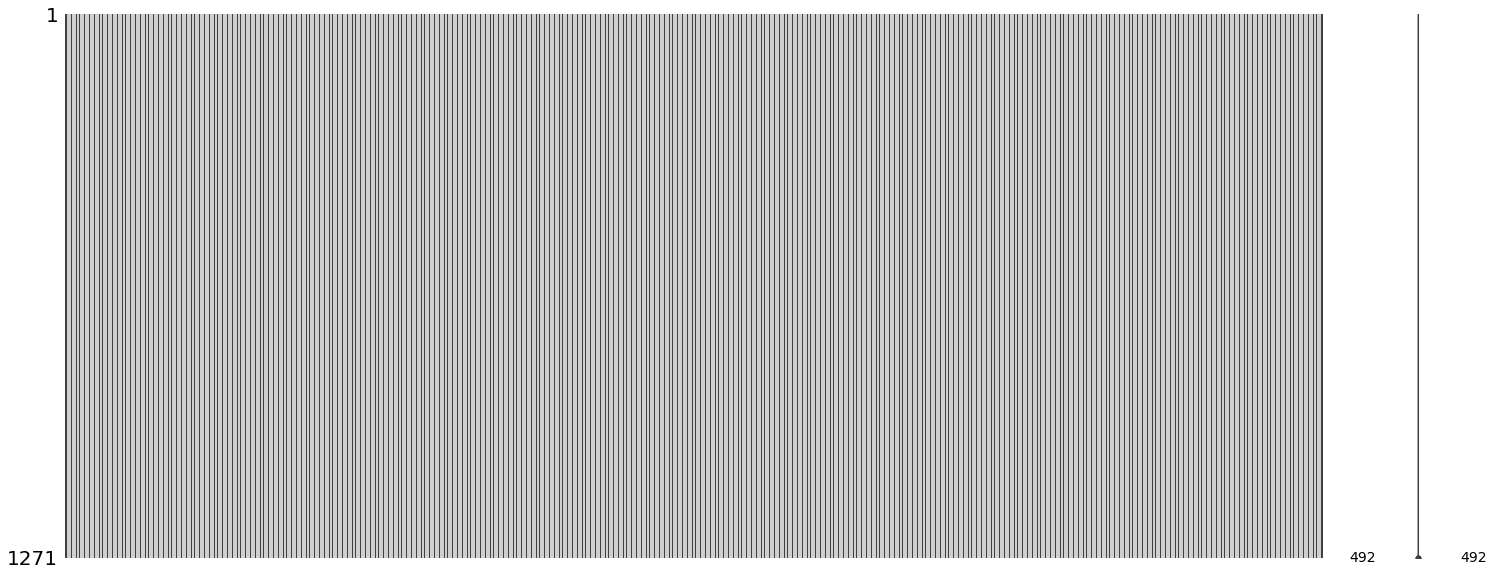

In [115]:
print('Data Shape before cleaning =', data_stock.shape)

missing_percentage = data_stock.isnull().mean().sort_values(ascending=False)
dropped_list = sorted(list(missing_percentage[missing_percentage > 0.05].index))
data_stock.drop(labels=dropped_list, axis=1, inplace=True)

print('Data Shape after cleaning =', data_stock.shape)

missingno.matrix(data_stock)

In [116]:
data_stock.to_excel('Data/stock_prices.xlsx')